In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
berka = pd.read_csv("C:/Users/niafrate/OneDrive - Ryerson University/CIND820/finData.csv")

In [3]:
berka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account_id         674 non-null    int64  
 1   amount             674 non-null    int64  
 2   duration           674 non-null    int64  
 3   payments           674 non-null    int64  
 4   frequency          674 non-null    object 
 5   date_diff          674 non-null    int64  
 6   card_type          674 non-null    object 
 7   no_orders          674 non-null    int64  
 8   avg_order          674 non-null    float64
 9   avg_trans          674 non-null    float64
 10  avg_bal            674 non-null    float64
 11  no_of_trans        674 non-null    int64  
 12  total_inhabitants  674 non-null    int64  
 13  avg_unemp_rt       674 non-null    float64
 14  avg_crime_rt       674 non-null    float64
 15  avg_salary         674 non-null    int64  
 16  age_at_loan        674 non

In [4]:
berka = berka.drop(labels='account_id', axis =1)

In [5]:
enc_stmFreq = (berka.groupby('frequency').size())/len(berka)
enc_stmFreq

frequency
Monthly Statement    0.820475
Per Transaction      0.045994
Weekly Statement     0.133531
dtype: float64

In [6]:
enc_cardType = (berka.groupby('card_type').size())/len(berka)
enc_cardType

card_type
classic    0.194362
gold       0.022255
junior     0.029674
none       0.753709
dtype: float64

In [7]:
berka['frequency'] = berka['frequency'].apply(lambda x : enc_stmFreq[x])
berka['card_type'] = berka['card_type'].apply(lambda x : enc_cardType[x])

In [8]:
berka.head(5)

,amount,duration,payments,frequency,date_diff,card_type,no_orders,avg_order,avg_trans,avg_bal,no_of_trans,total_inhabitants,avg_unemp_rt,avg_crime_rt,avg_salary,age_at_loan,gender,same_district,loan_status
0,252060,60,4201,0.820475,232,0.753709,3,4194.73,6998.75,34002.08,444,1204953,0.36,0.077,12541,29,1,0,1
1,316140,60,5269,0.820475,683,0.753709,1,5269.00,3866.65,9629.35,414,1204953,0.36,0.077,12541,23,0,1,1
2,320976,48,6687,0.820475,251,0.194362,1,6687.00,13399.67,47205.48,301,1204953,0.36,0.077,12541,56,0,1,1
3,270648,36,7518,0.133531,307,0.753709,1,7518.00,7433.61,44437.71,408,1204953,0.36,0.077,12541,53,0,1,1
4,215388,36,5983,0.820475,156,0.753709,1,5983.00,7253.25,35553.19,399,1204953,0.36,0.077,12541,30,0,0,1


In [9]:
berka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount             674 non-null    int64  
 1   duration           674 non-null    int64  
 2   payments           674 non-null    int64  
 3   frequency          674 non-null    float64
 4   date_diff          674 non-null    int64  
 5   card_type          674 non-null    float64
 6   no_orders          674 non-null    int64  
 7   avg_order          674 non-null    float64
 8   avg_trans          674 non-null    float64
 9   avg_bal            674 non-null    float64
 10  no_of_trans        674 non-null    int64  
 11  total_inhabitants  674 non-null    int64  
 12  avg_unemp_rt       674 non-null    float64
 13  avg_crime_rt       674 non-null    float64
 14  avg_salary         674 non-null    int64  
 15  age_at_loan        674 non-null    int64  
 16  gender             674 non

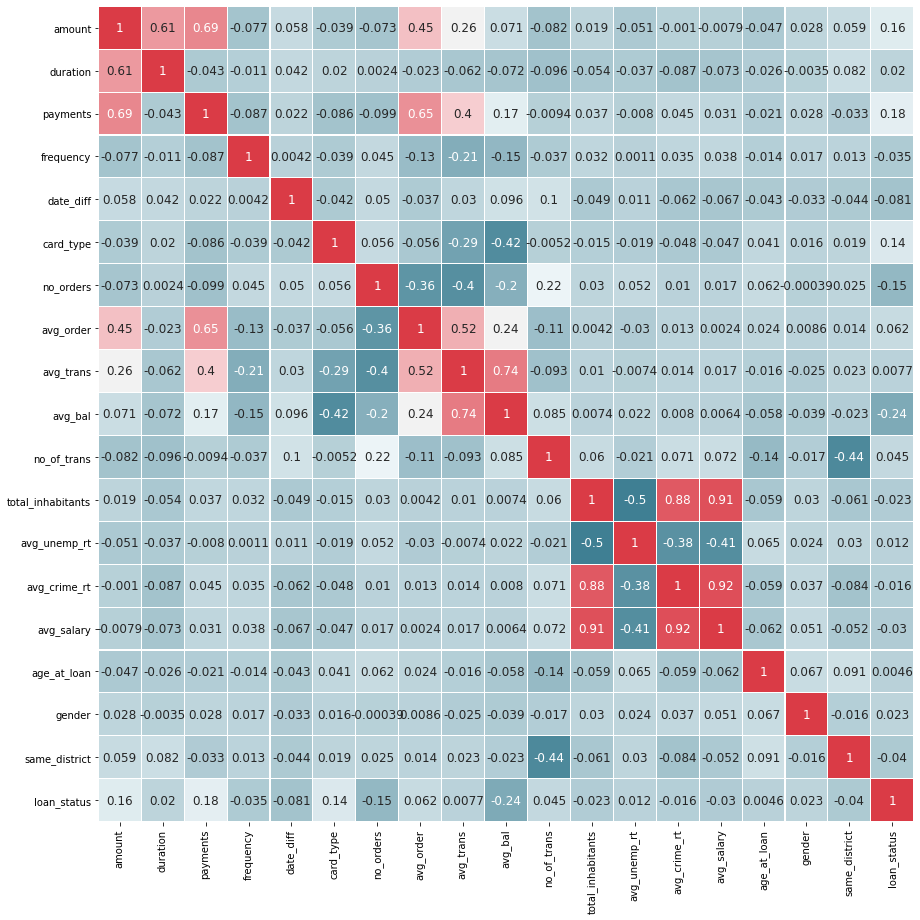

In [10]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(berka.corr(), cmap = sns.diverging_palette(220, 10, as_cmap = True), 
            square=True, cbar=False, ax=ax, annot=True, linewidths=0.1,vmax=1.0, 
            linecolor='white', annot_kws={'fontsize':12 })
plt.show()

In [13]:
berka.to_csv("C:/Users/niafrate/OneDrive - Ryerson University/CIND820/berka_cleaned.csv", index=False)